In [1]:

import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [4]:
formed_data_path = "/media/mohammed/Work/FORMED_ML/Data_FORMED.csv"
formed_data = pd.read_csv(formed_data_path)
for column in formed_data.columns:
    print(column)


name
S1_exc
S2_exc
S3_exc
S4_exc
S5_exc
T1_exc
T2_exc
T3_exc
T4_exc
T5_exc
HOMO
LUMO
gap
S1_ehdist
S2_ehdist
S3_ehdist
S4_ehdist
S5_ehdist
T1_ehdist
T2_ehdist
T3_ehdist
T4_ehdist
T5_ehdist
S1_osc
S2_osc
S3_osc
S4_osc
S5_osc
natoms
pentavalent_As/As(V)
trivalent/As(III)
monovalent/As(I)
other_As
borane_(BR3)
borinate_(BOR2,inc._borinic_esters_and_acids)
boronate_(BO2R,inc._boronic_esters_and_acids)
borate_(BO3)
diborane_(B-B)
boron_cluster/(poly)borane_(B-B-B)
tetracoordinated_boron_(BR4)
alkane_(R3C-CR3)
alkene_(R2C=CR2)
alkyne_(RC#C3)
allene_(R2C=C=R2)
cumulene_(C=C=C=C)
amide_(C(=O)N)
enamine_(R2C=CNR)
primary_amine_(NRH2)
secondary_amine_(NR2H)
tertiary_amine_(NR3)
azo_(N=N,not_including_azides)
hydrazine_(N-N)
iminium_(R2C=NR2+)
nitrile_(RC#N)
tetracoordinated_nitrogen_(NR4)
isonitrile_(RN#C)
azide_(N=N=N)
amine-borane_(N-B)
imine_(C=N)
alcohol_(CR3-OH)
ketone_(C(C=O)C)
aldehyde_(CHO)
carboxylate_(RCOOR,acid_and_ester)
carboxylate_(RCOO-,base)
peroxide_(ROOR)
ether_(C-O-C)
alkoxide

In [7]:
formed_data["S1_exc"].std()

0.9380603245880519

<Axes: xlabel='S1_exc', ylabel='Count'>

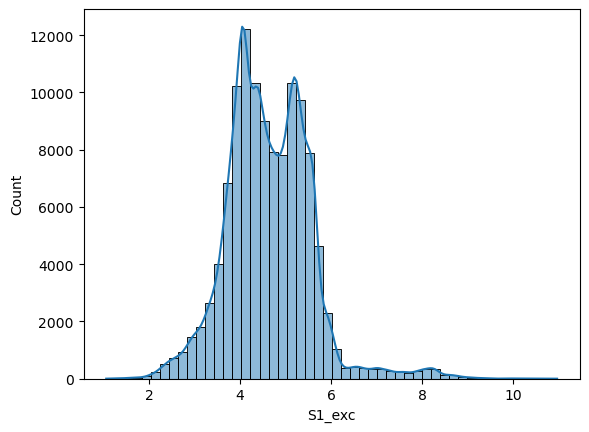

In [5]:
sns.histplot(formed_data["S1_exc"], bins=50, kde=True)

<Axes: xlabel='potential_CT', ylabel='Count'>

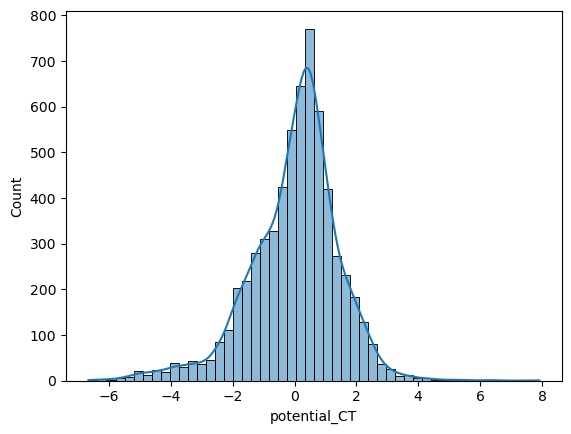

In [238]:
formed_data = formed_data[
    (formed_data["log_S2_osc"] > -1) & (formed_data["log_S1_osc"] > -6)
]
formed_data["log_S1_osc"] = np.log(formed_data["S1_osc"])
formed_data["log_S2_osc"] = np.log(formed_data["S2_osc"])
formed_data["potential_CT"] = (
    (formed_data["log_S2_osc"] - formed_data["log_S1_osc"])
    + np.abs((0.2 - (formed_data["S2_exc"] - formed_data["S1_exc"])))
    + (formed_data["S1_ehdist"])
    - formed_data["S2_ehdist"]
)
formed_data["binding_energy"] = formed_data["gap"] - formed_data["S1_exc"]
formed_data["diffS1_S2"] = 0.2 - (formed_data["S2_exc"] - formed_data["S1_exc"])
formed_data["diffosc"] = formed_data["log_S2_osc"] - formed_data["log_S1_osc"]
formed_data["diffdist"] = -formed_data["S2_ehdist"] + formed_data["S1_ehdist"]
formed_data["scaled_diffdist"] = StandardScaler().fit_transform(
    formed_data["diffdist"].values.reshape(-1, 1)
)
formed_data["scaled_diffosc"] = StandardScaler().fit_transform(
    formed_data["diffosc"].values.reshape(-1, 1)
)
formed_data["scaled_diffS1_S2"] = StandardScaler().fit_transform(
    formed_data["diffS1_S2"].values.reshape(-1, 1)
)
formed_data["potential_CT"] = (
    formed_data["scaled_diffdist"]
    + formed_data["scaled_diffosc"]
    + formed_data["scaled_diffS1_S2"]
)
sns.histplot(formed_data["potential_CT"], bins=50, kde=True)

Atoms(symbols='C29H26B2F4N4O', pbc=False)
potential_CT    7.915921
S1_exc            3.1481
S2_exc             3.359
gap              5.52229
S1_ehdist          6.803
S2_ehdist          3.381
log_S1_osc     -4.342806
log_S2_osc     -0.213193
Name: 92207, dtype: object
(2, 198)


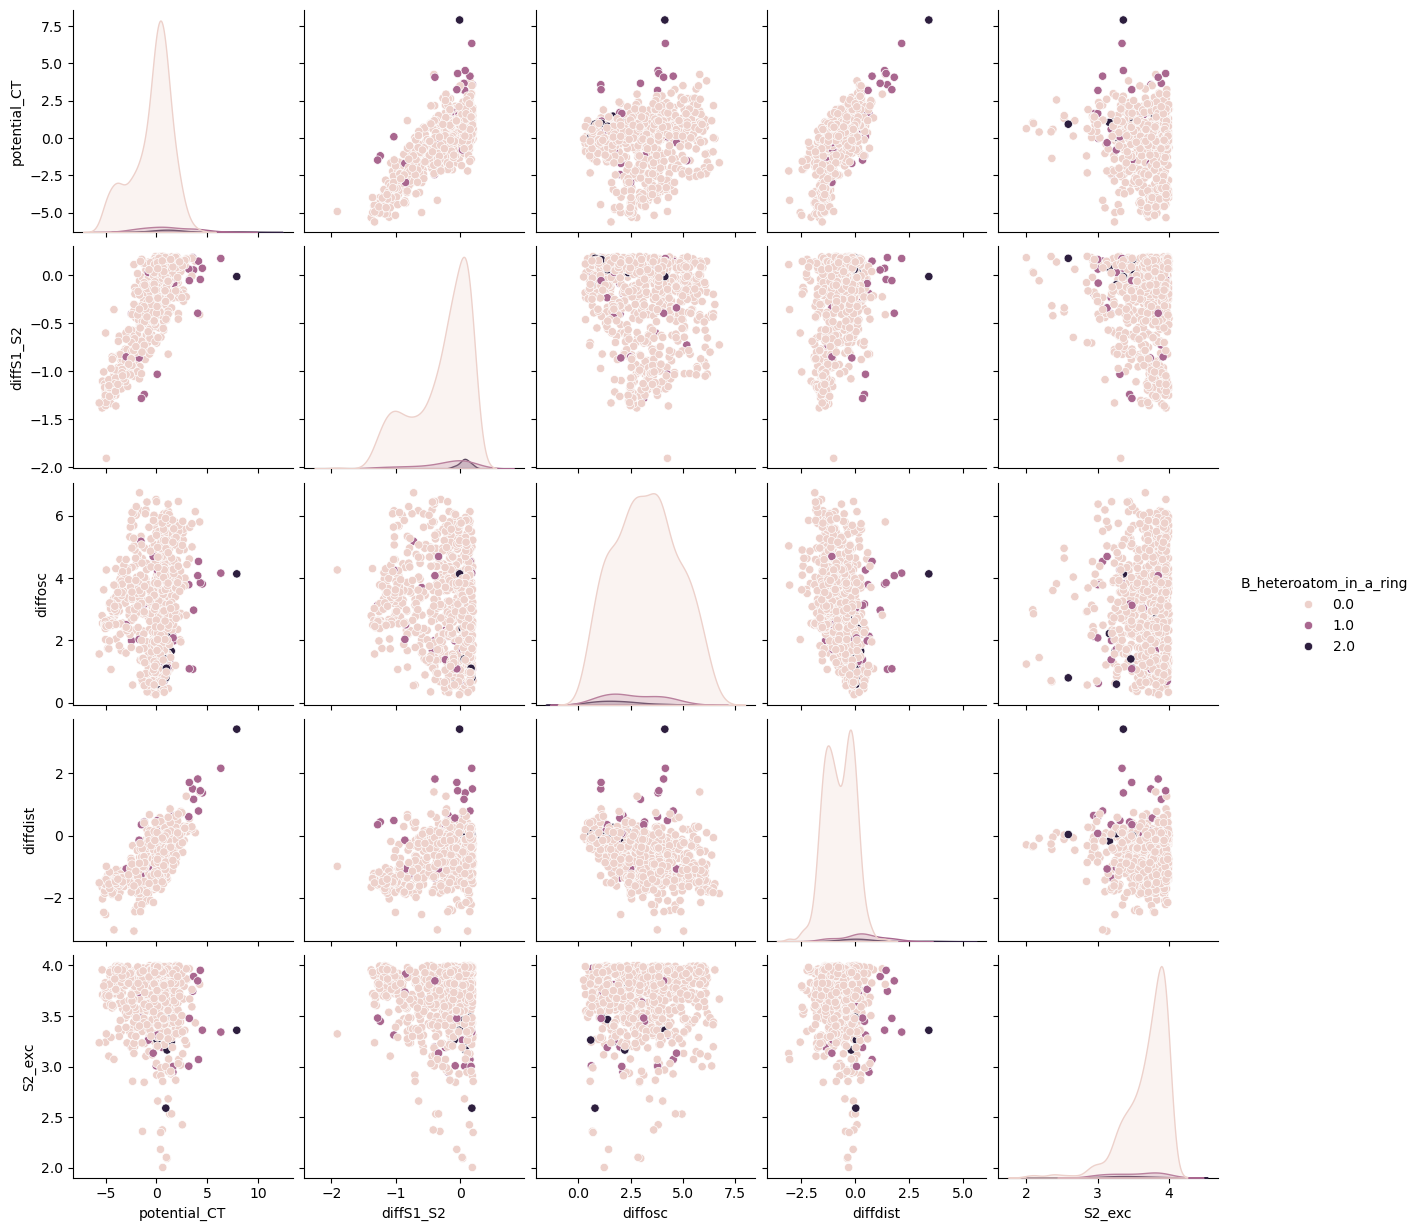

In [252]:
# get the molecule name with the highest potential_CT
formed_data_filtered = formed_data[
    (formed_data["log_S2_osc"] > -1)
    & (formed_data["log_S1_osc"] > -6)
    & (formed_data["log_S1_osc"] < -1)
    & (formed_data["S2_exc"] < 4)
]
max_potential_ct_row = formed_data_filtered.loc[
    formed_data_filtered["potential_CT"].idxmax()
]
mol_name = max_potential_ct_row["name"]
# sns.scatterplot(x="S2_exc", y="potential_CT", data=formed_data_filtered)
sns.pairplot(
    formed_data_filtered[
        [
            "potential_CT",
            "diffS1_S2",
            "diffosc",
            "diffdist",
            "S2_exc",
            "B_heteroatom_in_a_ring",
        ]
    ],
    hue="B_heteroatom_in_a_ring",
    diag_kind="kde",
    # diag_kws=dict(stat="density"),
)
from ase.visualize import view
from ase.io import read

atoms = read(f"/media/mohammed/Work/Work/FORMED_ML/XYZ_FORMED/{mol_name}.xyz")
print(atoms)
print(
    max_potential_ct_row[
        [
            "potential_CT",
            "S1_exc",
            "S2_exc",
            "gap",
            "S1_ehdist",
            "S2_ehdist",
            "log_S1_osc",
            "log_S2_osc",
        ]
    ]
)
print(formed_data_filtered[formed_data_filtered["potential_CT"] > 5].shape)
view(
    atoms,
    viewer="x3d",
    atoms_show_radii=True,
    atoms_show_numbers=True,
    viewer_backend="x3d",
)

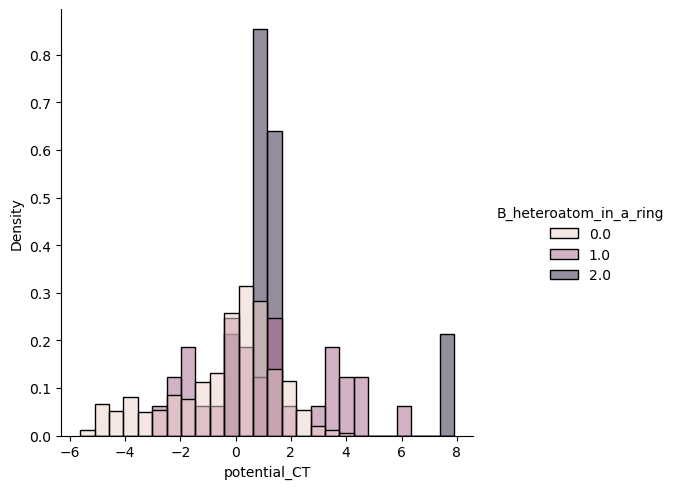

In [253]:
sns.displot(
    formed_data_filtered[
        [
            "potential_CT",
            "diffS1_S2",
            "diffosc",
            "diffdist",
            "S2_exc",
            "B_heteroatom_in_a_ring",
        ]
    ],
    x="potential_CT",
    hue="B_heteroatom_in_a_ring",
    stat="density",
    common_norm=False,
)


In [255]:
max_potential_ct_row = formed_data_filtered.sort_values(
    by="potential_CT", ascending=False
)
max_potential_ct_row = max_potential_ct_row[
    (max_potential_ct_row["S2_exc"] < 4) & (max_potential_ct_row["diffdist"] > 1)
]
mol_to_view = 3
mol_name = max_potential_ct_row.iloc[mol_to_view]["name"]
atoms = read(f"/media/mohammed/Work/Work/FORMED_ML/XYZ_FORMED/{mol_name}.xyz")
print(
    max_potential_ct_row.iloc[mol_to_view][
        [
            "potential_CT",
            "S1_exc",
            "S2_exc",
            "gap",
            "S1_ehdist",
            "S2_ehdist",
            "log_S1_osc",
            "log_S2_osc",
        ]
    ]
)
print(atoms)
print(mol_name)
view(
    atoms,
    viewer="x3d",
    atoms_show_radii=True,
    atoms_show_numbers=True,
    viewer_backend="x3d",
)


potential_CT    4.326246
S1_exc            3.7108
S2_exc            3.9522
gap              6.77182
S1_ehdist          4.948
S2_ehdist          3.506
log_S1_osc      -4.50986
log_S2_osc     -0.665532
Name: 100154, dtype: object
Atoms(symbols='O3NC4HC2HCHCHCHCHC2HCHCHCHCHCHC3HCHCHCHCHCHB', pbc=False)
TIJQAH


(585, 191)


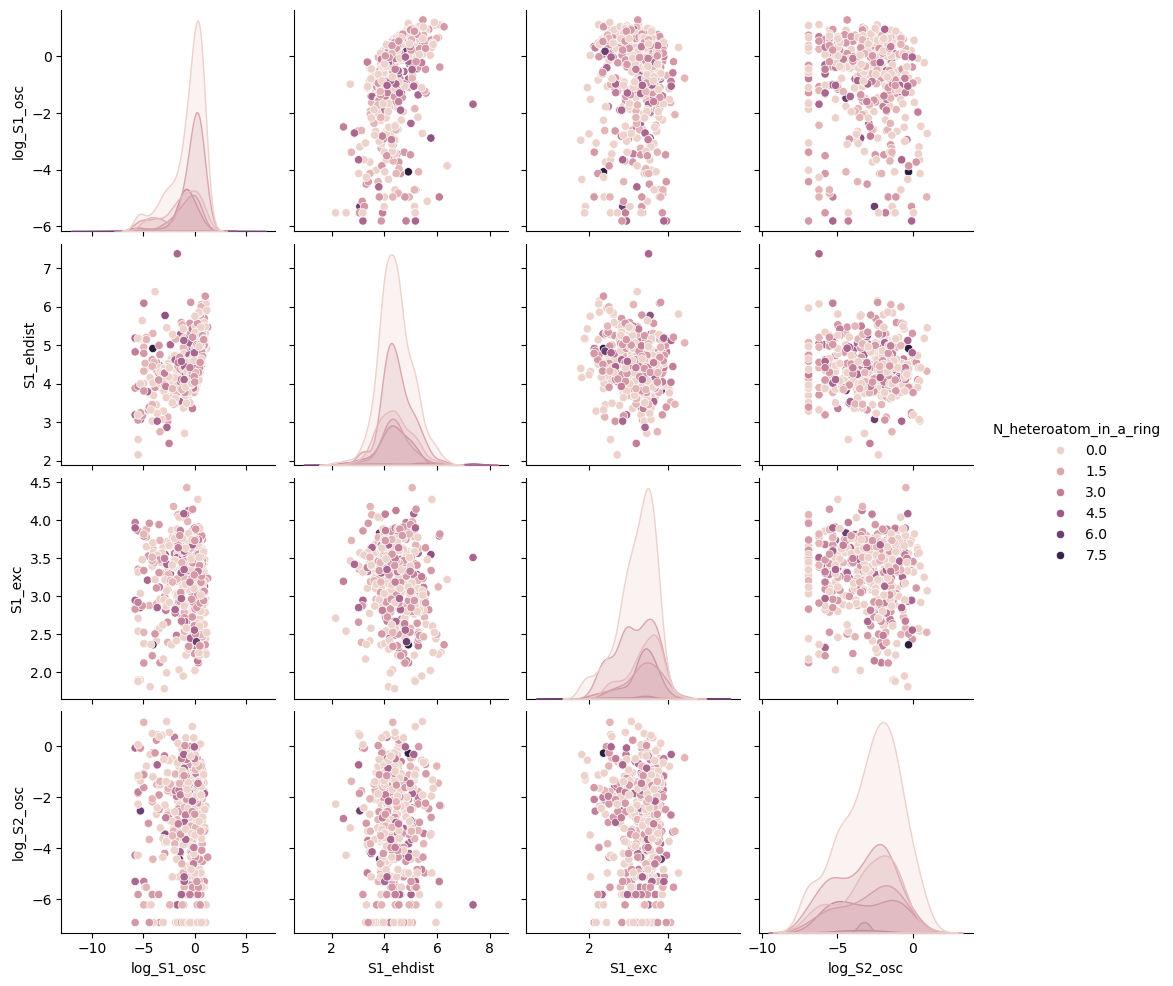

In [174]:
formed_data_filtered = formed_data[
    (formed_data["S1_exc"] < 5)
    & (formed_data["natoms"] > 50)
    & (formed_data["gap"] < 7)
    & (formed_data["S_heteroatom_in_a_ring"] > 0)
    & (formed_data["log_S1_osc"] > -6)
]
print(formed_data_filtered.shape)
sns.pairplot(
    formed_data_filtered[
        [
            "log_S1_osc",
            "S1_ehdist",
            "S1_exc",
            "log_S2_osc",
            "N_heteroatom_in_a_ring",
        ]
    ],
    hue="N_heteroatom_in_a_ring",
)

<Axes: xlabel='log_S1_osc', ylabel='Count'>

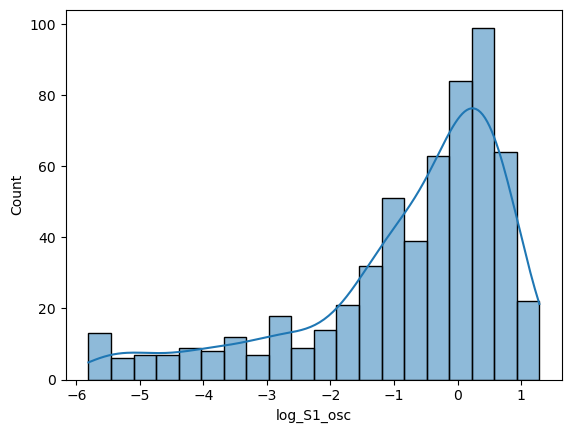

In [173]:
sns.histplot(formed_data_filtered["log_S1_osc"], bins=20, kde=True)

<Axes: xlabel='natoms', ylabel='Count'>

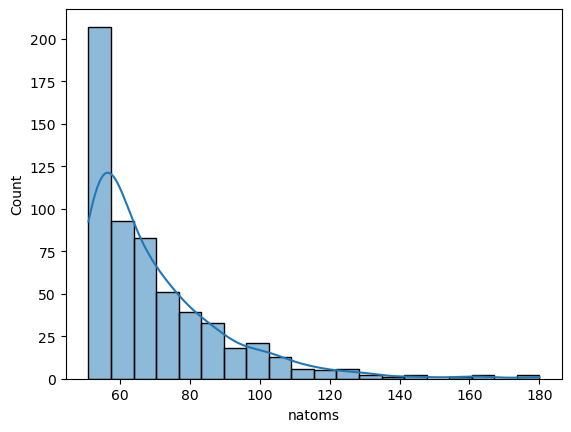

In [172]:
sns.histplot(formed_data_filtered["natoms"], bins=20, kde=True)

In [171]:
mol_name = formed_data_filtered["name"].sample(1).values[0]
from ase.visualize import view
from ase.io import read

atoms = read(f"/media/mohammed/Work/Work/FORMED_ML/XYZ_FORMED/{mol_name}.xyz")
print(atoms)
view(
    atoms,
    viewer="x3d",
    atoms_show_radii=True,
    atoms_show_numbers=True,
    viewer_backend="x3d",
)


Atoms(symbols='SONC6HCHC2HCHC3HC2HCHC2HCHCHCHCHCHCHCHCHCHCHCHCHCH', pbc=False)


In [164]:
# case of mordred descriptors
from mordred import GeometricalIndex
import rdkit.Chem
import rdkit
from rdkit import Chem
from rdkit import RDLogger

# Suppress RDKit warnings
RDLogger.DisableLog("rdApp.*")


def get_geom_shape(mol_name):
    calc = GeometricalIndex.GeometricalShapeIndex()
    mol = rdkit.Chem.rdmolfiles.MolFromXYZFile(
        f"/media/mohammed/Work/Work/FORMED_ML/XYZ_FORMED/{mol_name}.xyz"
    )
    rdkit.Chem.SanitizeMol(mol)
    mol = Chem.RemoveHs(mol)
    return calc(mol)


formed_data_filtered["geom_shape"] = formed_data_filtered["name"].swifter.apply(
    get_geom_shape
)

Pandas Apply:   0%|          | 0/585 [00:00<?, ?it/s]

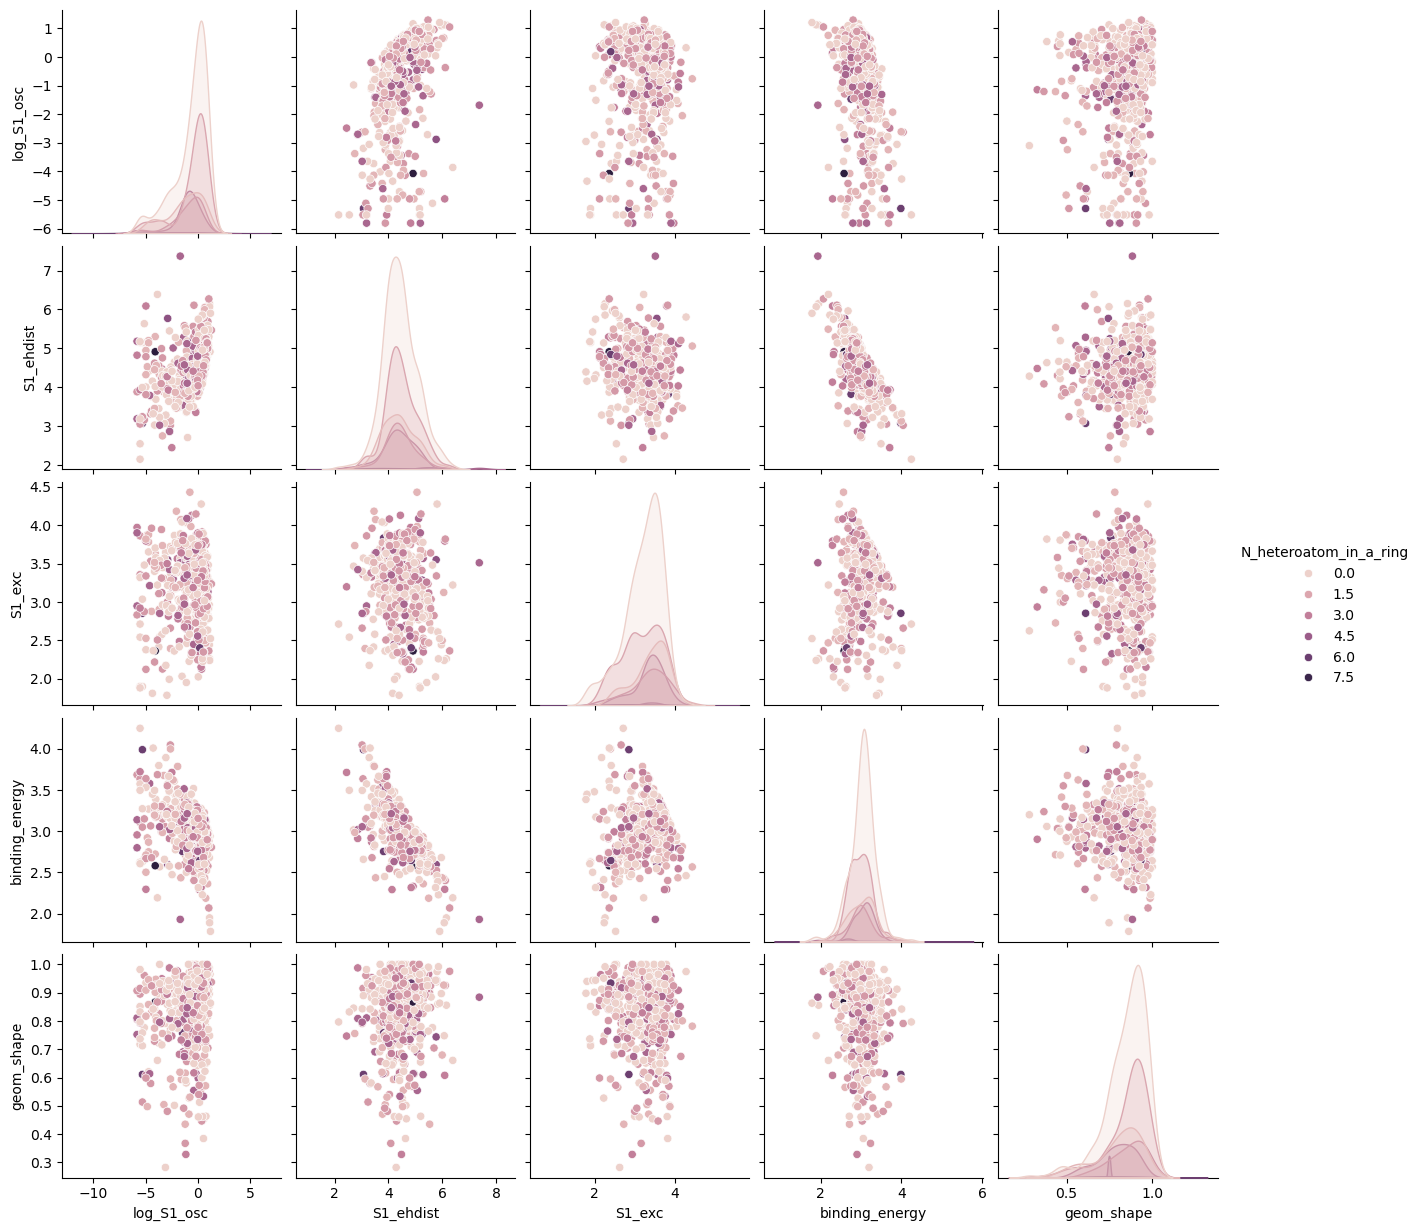

In [165]:
sns.pairplot(
    formed_data_filtered[
        [
            "log_S1_osc",
            "S1_ehdist",
            "S1_exc",
            "binding_energy",
            "N_heteroatom_in_a_ring",
            "geom_shape",
        ]
    ],
    hue="N_heteroatom_in_a_ring",
)

In [166]:
# calculate the r2 score of the different features
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from pandas.api.types import is_numeric_dtype

column_to_check = "S1_ehdist"
# formed_data_filtered = formed_data[(formed_data['S1_exc'] < 5) & (formed_data['natoms'] > 20) & (formed_data['gap'] < 7)]
# formed_data_filtered = formed_data[(formed_data['S1_exc'] < 5) & (formed_data['natoms'] > 50) & (formed_data['gap'] < 7) & (formed_data['S_heteroatom_in_a_ring'] > 0)]

formed_data_filtered = formed_data_filtered[
    (formed_data_filtered[column_to_check] > -5000)
    & (formed_data_filtered[column_to_check] < 5000)
]
for column in formed_data_filtered.columns:
    if not is_numeric_dtype(formed_data_filtered[column]):
        continue
    try:
        X = formed_data_filtered[[column]]
        y = formed_data_filtered[column_to_check]
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42
        )
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        model = LinearRegression()
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        if r2_score(y_test, y_pred) > 0.2:
            print(column, r2_score(y_test, y_pred))
            print("MSE", mean_squared_error(y_test, y_pred))
            print("MAE", mean_absolute_error(y_test, y_pred))
    except:
        print(column, "error")


gap 0.3109563453015576
MSE 0.31075947632272377
MAE 0.43736315374867657
S1_ehdist 1.0
MSE 6.742400899324888e-33
MAE 1.518253708889103e-17
S2_ehdist 0.23715973610444285
MSE 0.34404183147121525
MAE 0.4465421811919204
S3_ehdist 0.2110248364478854
MSE 0.35582870110659875
MAE 0.4570515838665642
T1_ehdist 0.4364722353417546
MSE 0.2541516663630736
MAE 0.35723157085187485
T2_ehdist 0.3625840511468662
MSE 0.2874753219402946
MAE 0.40153383625919553
T4_ehdist 0.3083848371873882
MSE 0.3119192294232275
MAE 0.4156801108743699
T5_ehdist 0.20184993994853073
MSE 0.35996658992106356
MAE 0.45475146968535535
S1_osc 0.26670335029442027
MSE 0.33071762768273977
MAE 0.42447920868441497
log_S2_osc error
binding_energy 0.5759458574988272
MSE 0.19124890325536587
MAE 0.3342495524821536


In [170]:
column_to_check = "log_S1_osc"

formed_data_filtered = formed_data_filtered[
    (formed_data_filtered[column_to_check] > -5000)
    & (formed_data_filtered[column_to_check] < 5000)
]

X = formed_data_filtered[["gap", "S1_ehdist", "binding_energy"]]  # ,"geom_shape"]]
y = formed_data_filtered[column_to_check]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
print(r2_score(y_test, y_pred))

print("MSE", mean_squared_error(y_test, y_pred))
print("MAE", mean_absolute_error(y_test, y_pred))

0.15881533646669277
MSE 2.394627620228576
MAE 1.0935807818416055
